In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import numpy as np
import math
import sys
import os
import pickle
import pprint
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

# dataset.mnistをインポートするために親ディレクトリをpathに追加
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# 各種関数のインポート
def sigmoid(x):
    return 1/(1 + np.exp(-1*x))

def step_function(x):
    y = x > 0
    return y.astype(np.int)

def ReLU(x):
    return np.maximum(0, x)

def softmax(x):
    x = x - np.max(x, axis = -1, keepdims = True)
    return np.exp(x)/np.sum(np.exp(x), axis = -1, keepdims = True)

In [2]:
def mean_squared_error(y, t):
    
    return 0.5*(np.sum((y-t)**2))


# test
y = np.array([0.2, 0.05, 0.1, 0.6, 0, 0, 0, 0.05, 0, 0])
t = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
u = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

print("loss = " + str(mean_squared_error(y, t)))
print("loss = " + str(mean_squared_error(y, u)))

loss = 0.10750000000000003
loss = 0.6074999999999999


In [3]:
def cross_entropy_error(y, t):
    
    if y.ndim == 1:
        # 1行の2次元配列を生成
        # データが複数ある場合と1つしかない場合でこの後の処理を共有するため
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # one-hot-label の場合
    if y.size == t.size:
        # 1があるlabelに変換
        t = t.argmax(axis = 1)
    
    # batch_size = データ数
    batch_size = y.shape[0]

    # 桁落ち防止
    delta = 1e-7
    # ベクトルyの中で、教師ラベルのデータ位置tだけ計算して交差エントロピーを計算
    # y[2, 4]とかになる、これは3個目のデータの4番目の値となる
    e = -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    
    return e


# test
y = np.array([0.2, 0.05, 0.1, 0.6, 0, 0, 0, 0.05, 0, 0])
t = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
u = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

print("loss = " + str(cross_entropy_error(y, t)))
print("loss = " + str(cross_entropy_error(y, u)))

loss = 0.510825457099338
loss = 2.302584092994546


In [4]:
#t = np.array([0, 0, 1, 0, 0])
t = np.array([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0]])

if t.ndim == 1:
    t = t.reshape(1, t.size)

t_ = t.argmax(axis = 1)
print(t)
print(t_)

[[0 1 0 0 0]
 [0 0 1 0 0]]
[1 2]


In [5]:
# mini-batch

# get data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = True, one_hot_label = True)

print(x_train.ndim)
print(t_train.ndim)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.ndim)
print(t_batch.ndim)

print(batch_mask)
print(x_batch)
print(t_batch)

2
2
(60000, 784)
(60000, 10)
2
2
[40685  1677 30618 42954 24904 18908 32271 31668 15173 20830]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
def cross_emtropy_error_not_ohl(y, t):
    
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    print(batch_size)
    
    delta = 1e-7
    
    # batch_sizeごとに、あるデータに対するニューラルネットワークの出力を見る
    e = -1*np.sum(t*(np.log(y[np.arange(batch_size), t] + delta)))/batch_size
    
    return e

# test
y = np.array([0.2, 0.05, 0.1, 0.6, 0, 0, 0, 0.05, 0, 0])
t = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
u = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])


print("loss = " + str(cross_emtropy_error(y, t)))
print("loss = " + str(cross_emtropy_error(y, u)))

NameError: name 'cross_emtropy_error' is not defined

In [ ]:
y = np.array([[1, 3], [5, 7]])
t = np.array([1, 1])

x = np.arange(y.shape[0])


print(y[x, t])

In [ ]:
a = np.array([[11, 12], [21, 22]])

# 下二つは同じ意味の表現
print(a[0][1])
print(a[0, 1])

In [ ]:
# 中心差分による数値微分
def numerical_diff(f, x):
    
    h = 1e-4
    tmp = f(x+h) - f(x-h)
    
    return tmp/(2*h)


# test
def f1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0, 20, 0.1)
y = f1(x)
plt.plot(x, y, label = "f1")
#plt.show()

d1 = numerical_diff(f1, 5)    # 0.2
d2 = numerical_diff(f1, 10)   # 0.3
print("d1 =", d1, "d2 =", d2)

y1 = d1*x - 0.25 
y2 = d2*x - 1

plt.plot(x, y1, label = "d1")
plt.plot(x, y2, label = "d2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

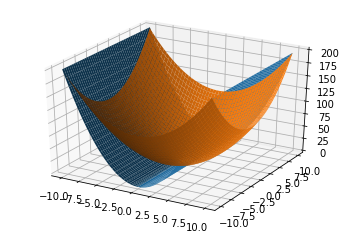

In [8]:
def f2(x):
    return x[0]**2 + x[1]**2

x = np.array([[np.arange(-10, 10, 0.1)],[np.arange(-10, 10, 0.1)]])
X0, X1 = np.meshgrid(x[0], x[1])

# なんでこれで結果が異なる？ meshfrid()しないとx[0]とx[1]の組み合わせ全部が辿れない？
y1 = f2(x)
y2 = f2([X0, X1])

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

ax.plot_surface(X0, X1, y1)
ax.plot_surface(X0, X1, y2)
plt.show()

In [ ]:
a = np.array([[11, 12, 13],[21, 22, 23]])

print(a.size)
print(a.ndim)

In [9]:
# 偏微分による勾配の計算
# 1次元のデータ用
def numerical_gradient_no_batch(f, x):
    
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp = x[idx]
        
        # f(x+h)
        x[idx] = tmp + h
        f_plus_h = f(x)
        
        # f(x+h)
        x[idx] = tmp - h
        f_minus_h = f(x)
        
        # diff
        grad[idx] = (f_plus_h - f_minus_h)/(2*h)
        x[idx] = tmp
        
    return grad


# 2次元以上のデータ用
def numerical_gradient_2d(f, x):
    
    #　データ数が1の時
    if x.ndim == 1:
        return numerical_gradient_no_batch(f, x)
        
    else:
        grad = np.zeros_like(x)
        
        # indexと要素をタプルで返す関数enumerate()を使用
        for idx, x_idx in enumerate(x):
            grad[idx] = numerical_gradient_no_batch(f, x_idx)
            
    return grad

def numerical_gradient(f, x):
    
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ["multi_index"], op_flags = ["readwrite"])
    # np.nditerによって多次元配列でも各要素ごとにループできる
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        # f(x+h)
        x[idx] = tmp + h
        f_plus_h = f(x)
        
        # f(x+h)
        x[idx] = tmp - h
        f_minus_h = f(x)
        
        # diff
        grad[idx] = (f_plus_h - f_minus_h)/(2*h)
        x[idx] = tmp
        
        it.iternext()
        
    return grad


# test
print(numerical_gradient(f2, np.array([3.0, 4.0])))
print(numerical_gradient(f2, np.array([0.0, 2.0])))
print(numerical_gradient(f2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [ ]:
# 勾配の可視化

x0 = np.arange(-5, 5, 0.5)
#print("x0 =", x0)

x1 = np.arange(-5, 5, 0.5)
#print("x1 =", x1)

x = np.array([x0, x1])
#print("x =", x)

print("x.shape =", x.shape)

X0, X1 = np.meshgrid(x0, x1)
X0 = X0.flatten()
X1 = X1.flatten()

print("np.array([X0, X1]).shape =", np.array([X0, X1]).shape)
print("np.array([X0, X1]).T.shape =",np.array([X0, X1]).T.shape)
print("np.array([X0, X1]).ndim =",np.array([X0, X1]).ndim)
print("np.array([X0, X1]).T.ndim =",np.array([X0, X1]).T.ndim)

# 転置を取ってる理由がよくわからん
grad = numerical_gradient(f2, np.array([X0, X1]).T).T
print("grad.shape =", grad.shape)

#print(grad)
plt.quiver(X0, X1, -1*grad[0], -1*grad[1], angles="xy")
plt.show()

In [ ]:
# 勾配降下法
def gradient_descent(f, init_x, lr = 0.1, step_num = 100):
    
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x = x - lr*grad
        
    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(f2, init_x)

print(x)
print(x_history.shape)
print("x_history = ", x_history)

# 100*2の行列なので、0列目と1列目のすべてを表示する
plt.plot(x_history[:,0], x_history[:,1], "o")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.show()

In [10]:
# ニューラルネットワークでの勾配降下法

class SimpleNet:
    
    def __init__(self):
        # 乱数による配列生成
        self.W =  np.random.randn(2, 3)
        
    def predict(self, x):
        #　内積を計算
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        #　xとWで内積を計算
        z = self.predict(x)
        #　出力関数softmax()
        y = softmax(z)
        #　交差エントロピーによる損失関数の計算
        loss = cross_entropy_error(y, t)
        
        return loss
    
# test
net = SimpleNet()
print(net.W)

x = np.array([0.3, 0.7])
print(x)

# selfは既定の第一引数なので、渡すのはxだけでよい
pre_result = net.predict(x)
print(pre_result)

t = np.array([0, 1, 0])
loss_out = net.loss(x, t)

[[ 0.21423524 -1.48988828 -0.01103258]
 [ 0.81727715  1.3218905  -0.24440798]]
[0.3 0.7]
[ 0.63636458  0.47835687 -0.17439536]


In [ ]:
def f(W):
    # 引数はダミー、戻り値には使用されない
    # この関数はxとtから損失関数を計算する
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

now is 0 times roop...
loss = 1.1453851795929562
now is 1 times roop...
loss = 0.5351093107498265
now is 2 times roop...
loss = 0.28825728882263835
now is 3 times roop...
loss = 0.18531437340541423
now is 4 times roop...
loss = 0.1333744665708697
now is 5 times roop...
loss = 0.102966840338378
now is 6 times roop...
loss = 0.08327232640986242
now is 7 times roop...
loss = 0.0695839442851696
now is 8 times roop...
loss = 0.059567700929091735
now is 9 times roop...
loss = 0.05194711312400408
now is 10 times roop...
loss = 0.045969747072249184
now is 11 times roop...
loss = 0.041165225184458004
now is 12 times roop...
loss = 0.03722528096529642
now is 13 times roop...
loss = 0.033939919181530664
now is 14 times roop...
loss = 0.031161397770152106
now is 15 times roop...
loss = 0.02878289611341981
now is 16 times roop...
loss = 0.026725352668455275
now is 17 times roop...
loss = 0.02492905348063912
now is 18 times roop...
loss = 0.02334809120834264
now is 19 times roop...
loss = 0.02194661

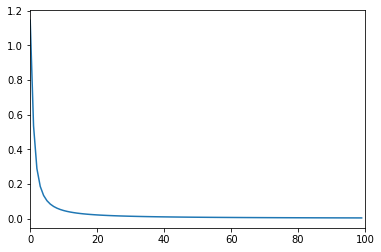

In [21]:
#　2層ニューラルネットワーククラス
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        
        self.parameter = {}
        self.parameter["W1"] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.parameter["b1"] = np.zeros(hidden_size)
        self.parameter["W2"] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.parameter["b2"] = np.zeros(output_size)
        
        return None
        
    # ニューラルネットワークによる出力計算
    def predict(self, x):
        W1, W2 = self.parameter["W1"], self.parameter["W2"]
        b1, b2 = self.parameter["b1"], self.parameter["b2"]
        
        z1 = np.dot(x, W1) + b1
        y1 = sigmoid(z1)
        z2 = np.dot(y1, W2) + b2
        y2 = softmax(z2)
        
        return y2
    
    # 入力x、重みWによる計算結果とラベルtでの損失関数を計算する
    def loss(self, x, t):
        out = self.predict(x)
        loss_func_value = cross_entropy_error(out, t)
        
        return loss_func_value
    
    # 正答率を返す
    def accuracy(self, x, t):
        out = self.predict(x)
        y = np.argmax(out, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t)/float(x.shape[0])  # 正答数をデータ数で割る(小数点が消えないようにデータ点数をfloatに変換)
        
        return accuracy
    
    # 損失関数に対する重みの勾配を返す
    def numerical_gradient(self, x, t):
        #　ラムダ式
        loss_W = lambda W: self.loss(x, t)
        
        gradient = {}
        gradient["W1"] = numerical_gradient(loss_W, self.parameter["W1"])
        gradient["b1"] = numerical_gradient(loss_W, self.parameter["b1"])
        gradient["W2"] = numerical_gradient(loss_W, self.parameter["W2"])
        gradient["b2"] = numerical_gradient(loss_W, self.parameter["b2"])
        
        return gradient

# 教師データとテストデータをロード
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

# 訓練履歴を格納するリスト(グラフ表示に使用する)
train_loss_hist = []

# ハイパーパラメータ
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

#　インスタンス生成
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    
    #　処理中であることを表示
    print("now is {} times roop...".format(i))
    
    #　ミニバッチ取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_size]
    t_batch = t_train[batch_size]
    
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # パラメータ更新
    for key in ("W1", "b1", "W2", "b2"):
        network.parameter[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    print("loss = {}".format(loss))
    
    train_loss_hist.append(loss)

print("learning finished!")
    
plt.plot(train_loss_hist[:])
plt.xlim(0, iters_num)
plt.show()

In [ ]:



# ----- この下は関数の使い方確認だけ　-----



In [ ]:
# test of enumerate()
#test_array = np.array([[[111, 112],[121, 122], [131, 132]],[[211, 212],[221, 222], [231, 232]]])
#test_array = np.array([[11, 12, 13, 14, 15], [21, 22, 23, 24, 25]])
test_array = np.array([[11, 12], [21, 22], [31, 32], [41, 42], [51, 52]])
print("test_array = {}".format(test_array))
print(test_array[3, 1])

print("test_array.ndim = {}".format(test_array.ndim))

print("list(enumerate(test_array)) =", list(enumerate(test_array)))
for idx, i in enumerate(test_array):
    print("idx = {}, a[idx] = {}".format(idx, i))


In [ ]:
a = np.array([11, 12, 13, 14])
print("a = {}".format(a))
print("a_ndim = {}".format(np.ndim(a)))
print("a_size = {}".format(np.size(a)))

# (-1, a.size)だと次元を決める数値が2つになるので、2次元配列となる
#a_reshape = a.reshape(-1, a.size)
a_reshape = a.reshape(1, 1, 1, 1, 1, a.size)  # こんなこともできる
print("a_reshape = {}".format(a_reshape))
print("a.reshape.ndim = {}".format(np.ndim(a_reshape)))
print("a_reshape.shape = {}".format(a_reshape.shape))

# 1次元配列になる
a_flatten = a.flatten()
print("a.flatten.ndim = {}".format(np.ndim(a_flatten)))
print("a_ flatten = {}".format(a_flatten))
print("a_flatten.shape = {}".format(a_flatten.shape))

In [ ]:
test_a = np.array([[[111, 112],[121, 122], [131, 132]],[[211, 212],[221, 222], [231, 232]]])
test_b = np.array([[11, 12, 13, 14, 15], [21, 22, 23, 24, 25]])
test_c = np.array([[11, 12], [21, 22], [31, 32], [41, 42], [51, 52]])

print(test_a.shape)
print(test_a.shape[0])
print(test_b.shape)
print(test_c.shape)

In [ ]:
a  = np.array([[1,2],[3,4]])
print("a = {}".format(a))
print("a[(0,0)] = {}".format(a[(0,0)]))

it = np.nditer(a, flags = ["multi_index"], op_flags = ["readwrite"])
#　イテレータが最後になるまで継続
while not it.finished:
    
    #　タプルで配列のindexを取得
    idx = it.multi_index
    print("idx = {}".format(idx))
    #　タプルによる配列要素の抜き出し
    print("a[idx] = {}".format(a[idx]))
    #　イテレータを次に進ませる
    it.iternext()
    